# Gaia dataset and queries with ADQL (Astronomical Data Query Language)

<img src="cd8078fdc9f1430eded3770a2c489767.jpg">

### Overview

####  ADQL is a specialized variant of the SQL query language adapted for accessing the astronomical datasets of the virtual observatory,via the Table access protocol (TAP). ADQL is dedigned to handle large datasets distributed over several locations,while not retrieving data that is not needed.

### Language

#### ADQL is a query language that allows data to be retrieved via a single command, the select statement, which is designed to perform as the select statement in the SQL language. ADQL has extensions designed to improve handling of astronomical data such as spherical co-ordinates that are not handled by standard SQL

### Example

```sql
SELECT source_id, ra, dec
FROM gaiadr1.tgas_source
WHERE phot_g_mean_flux > 13
```


### Basic Queries with  Database with Gui
The gaia archive found here:https://gea.esac.esa.int/archive/. Click on search tab.
Search tab has tree options: Basic, Advenced(ADQL) and Query Results.
<img src="gaia-archive-search.png">

### Basic Query with ADQL on jupyter notebook

### Install the necessary libraries

In [1]:
#!pip install astroquery

### Import  the necessary libraries

In [2]:
from astroquery.gaia import Gaia
import pandas as pd

c:\Users\2189v\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### ADQL Query for 10.000 closest stars

In [3]:
print("Qerying Gaia database...")
query = """
SELECT TOP 10000
       source_id,
       parallax,
       parallax_error,
       phot_g_mean_mag,
       bp_rp,
       ra,
       ra_error
 FROM gaiadr3.gaia_source
WHERE parallax > 0
ORDER BY parallax DESC
"""
path = 'data/closest_10000.csv'
job = Gaia.launch_job(query, output_file=path, output_format='csv', dump_to_file=True)
print(f"Job finished. Data saved to {path}. Job Info: {job}")

Qerying Gaia database...
Job finished. Data saved to data/closest_10000.csv. Job Info: Jobid: None
Phase: COMPLETED
Owner: None
Output file: data/closest_10000.csv
Results: None


####  Explanation of Column Names

The dataset you provided contains the following column names and their meanings:

| Column Name | Meaning |
| --- | --- |
| `source_id` | Unique identifier for the data source record. |
| `parallax` | The observed parallax of the star (the apparent shift in position of celestial objects). |
| `parallax_error` | The measurement error associated with the parallax value. |
| `phot_g_mean_mag` | The Gaia G-band photometric mean magnitude of the star. |
| `bp_rp` | The color index between the blue (BP) and red (RP) bands. |
| `ra` | The right ascension coordinate (in the equatorial coordinate system). |
| `ra_error` | The error associated with the right ascension coordinate. |

These column names represent the fundamental astronomical properties of the stars in the dataset.

### EDA - Exploratory Data Analysis

#### Load Data

In [4]:
df=pd.read_csv(path)
df.head()

,source_id,parallax,parallax_error,phot_g_mean_mag,bp_rp,ra,ra_error
0,5853498713190525696,768.066539,0.049873,8.984749,3.804580,217.392321,0.023999
1,4472832130942575872,546.975940,0.040116,8.193974,2.833697,269.448503,0.026239
2,3864972938605115520,415.179416,0.068371,11.038391,4.184836,164.103190,0.066837
3,762815470562110464,392.752945,0.032067,6.551172,2.215609,165.830960,0.024126
4,2947050466531873024,374.489589,0.231335,8.524133,-0.278427,101.286626,0.164834


### Data Description

In [5]:
df.shape

(10000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        10000 non-null  int64  
 1   parallax         10000 non-null  float64
 2   parallax_error   10000 non-null  float64
 3   phot_g_mean_mag  9985 non-null   float64
 4   bp_rp            9632 non-null   float64
 5   ra               10000 non-null  float64
 6   ra_error         10000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


### Data Visualization

#### Import the necessary libraries

In [7]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Visualize the Data

##### Assuming 'df' is your DataFrame

In [8]:

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['parallax'],
    y=df['ra'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['bp_rp'],
        colorscale='Viridis',
        showscale=True,
        colorbar_title="bp_rp"
    )
))

fig.update_layout(
    title='Interactive Scatter Plot',
    xaxis_title='Parallax',
    yaxis_title='RA',
    hovermode='closest'
)

fig.show()

#### Explanation this Plot
This graph creates a scatter plot using the parallax and ra columns. Each point represents a star in the dataset.

The colors of the points vary based on the values in the bp_rp column. The bp_rp column indicates the difference in brightness between the blue (BP) and red (RP) wavelengths of the stars. This allows an additional attribute to be visualized through the color coding.

The graph is interactive, meaning users can hover over the points to see more information. This type of live visualization can be very useful for data exploration and analysis.

### Plot of the 1000 Closest Stars

#### Import the necessary libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np

###### Calculate the distance 
* Calculate distance in parsecs
* Calculate absolute g-band photometric magnitude
* Calculate absolute magnitude

In [10]:
df['distance'] = 1 / (df['parallax'] * 1e-3)  

df['abs_g'] = df['phot_g_mean_mag'] + 5 + 5 * np.log10(df['distance'])

df['abs_mag'] = df['phot_g_mean_mag'] + 5 * (np.log10(df['distance']) - 1)

#### # Plotting the Color-Magnitude Diagram
(bp_rp,abs_mag)

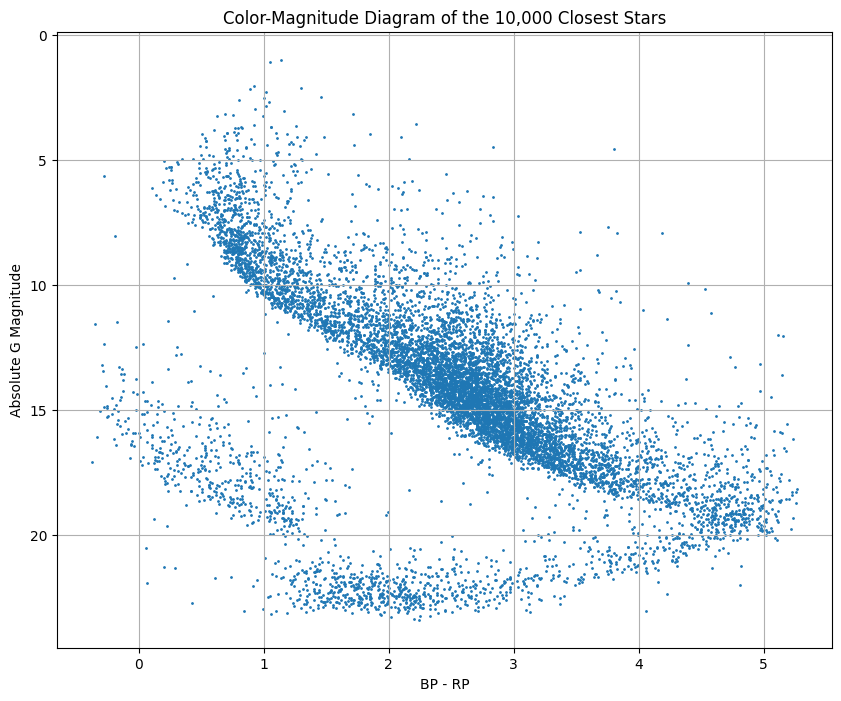

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(df['bp_rp'], df['abs_mag'], s=1)
plt.gca().invert_yaxis()  
plt.xlabel('BP - RP')
plt.ylabel('Absolute G Magnitude')
plt.title('Color-Magnitude Diagram of the 10,000 Closest Stars')
plt.grid(True)
plt.show()

#### Explonation of the Plot
This visual shows the color-magnitude diagram of the 10,000 closest stars. The position of the stars provides information about their surface temperatures (color index) and luminosities (absolute magnitude).

#### Plot parallax vs distance

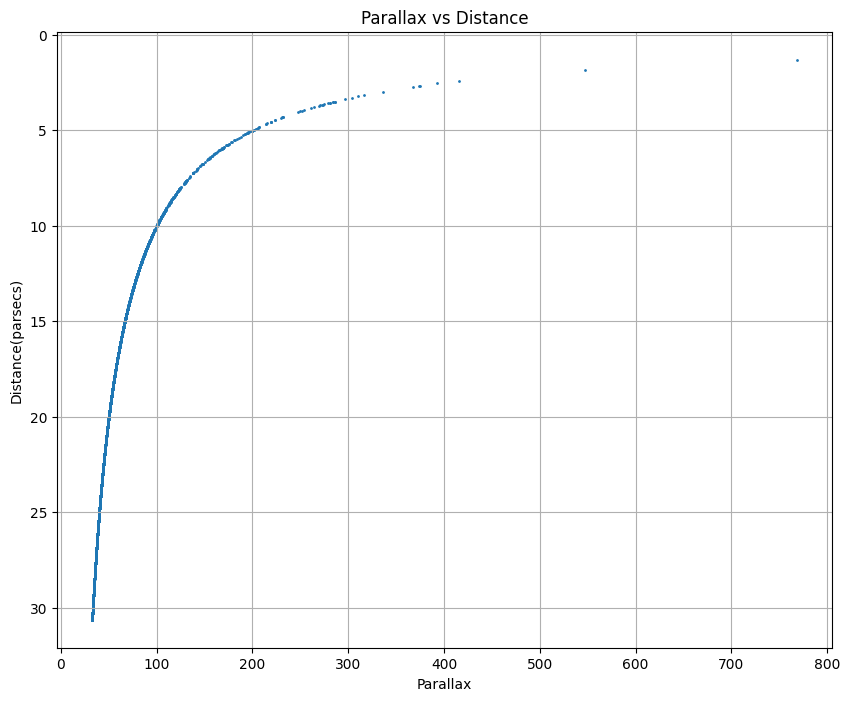

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(df['parallax'], df['distance'], s=1)
plt.gca().invert_yaxis()  
plt.xlabel('Parallax')
plt.ylabel('Distance(parsecs)')
plt.title('Parallax vs Distance')
plt.grid(True)
plt.show()

#### Explonation of the Plot
This plot displays a scatter graph of the parallax and distance values for the stars in the dataset. As the parallax values increase, the distance to the stars decreases. This visualization demonstrates the inverse relationship between parallax and distance, and illustrates the distances to the stars based on their parallax measurements.

### Conclusion
In this notebook, we have used the Gaia DR3 dataset to query the 10,000 closest stars to Earth using ADQL. We have performed exploratory data analysis (EDA) on the retrieved data, including visualizations of the relationships between various parameters such as right ascension, parallax, color index, absolute magnitude, and distance. These visualizations provide insights into the properties of stars in our cosmic neighborhood, and demonstrate the power of ADQL queries for accessing and analyzing astronomical data

#### References
1. ADQL Wiki: https://en.wikipedia.org/wiki/Astronomical_Data_Query_Language
2. Gaia Archive: https://gea.esac.esa.int/archive/
3. Gaia DR3: https://www.cosmos.esa.int/web/gaia/dr3
4. Gaia TAP + Astroquery: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html
5. ADQL: https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html
6. Intro2Astro — Gaia Introduction: https://github.com/howardisaacson/Intro-to-Astro2024/blob/main/Week4_TESS_Gaia/GaiaTutorialAssignment.ipynb

#### Further Reading
* https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook
* https://en.wikipedia.org/wiki/Transiting_Exoplanet_Survey_Satellite
* https://www.karar.com/yazarlar/zafer-acar/tess-ile-yeni-dunyalar-kesfetmek-6853#google_vignette
* https://www.esa.int/

### Astropy and Astroquery with Jupyter Notebook
https://cevheri.medium.com/astronomical-data-analysis-with-python-using-astropy-and-astroquery-ff7857588c5f